In [1]:
import pyrokebabs as pb
import pandas as pd
import numpy as np
from Bio.Seq import Seq
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, LeaveOneOut, KFold
#!pip install Bio strkernel
from sklearn.svm import SVC
import time
from sklearn.model_selection import GroupKFold

from strkernel.gappy_kernel import gappypair_kernel as gk
from sklearn.svm import LinearSVC
import random
from sklearn.preprocessing import normalize

In [2]:
def DNA(length):
    return ''.join(random.choice('CGTA') for _ in range(length))

amount = 150000
seq = np.zeros(amount,dtype=object)
tar = np.zeros(amount)

for i in range(amount):
    seq[i] = DNA(5)
    if i & 2 == 0:
        tar[i] = 1
    else:
        tar[i] = -1

In [2]:
data1 = [Seq(x) for x in seq]
promoter_data = {'data': data1,
             'target': tar,
             'feature_names': [],
             'target_names': ['pos', 'neg']}



#promoter_data_raw = pd.read_csv('testdata/promoters.csv', sep=',')
#data1 = [Seq(x) for x in promoter_data_raw.iloc[:, -1]]
#promoter_data = {'data': data1,
            #'target': np.where(promoter_data_raw.iloc[:, 0] == '-', -1 ,1),
            #'feature_names': promoter_data_raw.columns[2],
            #'target_names': ['pos', 'neg']}

#data must be presented in the form of bioSeq
#data = [Seq(x) for x in promoter_data['data']]
#target = promoter_data['target']
#data = [Seq(x) for x in ['AATTGGCC', 'ACGTACGT', 'CCGGTTAA']]
#data_grouped = np.array_split(data1,10)
#X = data_grouped
#y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1])
#groups = np.array([0,1,2,3,0,1,2,3,0,1])




#promoter_data

NameError: name 'seq' is not defined

In [4]:
elapsed_time = 0
st = time.time()
flo = pb.Pybabs(promoter_data,0)
kernel = flo.createKernel(5,0,True)
#norm_kernel = normalize(kernel, axis=1, norm='l1')
#row_sums = kernel.sum(axis=1)
#kernel2 = kernel/row_sums[:, np.newaxis]
et = time.time()
elapsed_time = et - st
print("Time difference of ", elapsed_time , "secs")

Time difference of  8.475001335144043 secs


In [5]:
elapsed_time = 0
st = time.time()
clf = SVC(C=0.0125, kernel='linear')
clf.fit(kernel, promoter_data['target'])
et = time.time()
elapsed_time = et - st
print("Time difference of ", elapsed_time , "secs")

Time difference of  367.26957416534424 secs


In [6]:
elapsed_time = ?
st = time.time()
cld = LinearSVC(C=0.0125)
cld.fit(kernel, promoter_data['target'])
et = time.time()
elapsed_time = et - st
print("Time difference of ", elapsed_time , "secs")

SyntaxError: invalid syntax (4238345163.py, line 1)

In [ ]:
df,dict = flo.getWeights(cld)
#df,dict = flo.getWeights(best_model)
df
#print(dict)
#print(data)

256
[-5.63497098e-02  4.40734199e-02  1.48223809e-02 -1.32647277e-02
 -4.71178457e-03 -5.59191886e-04 -1.47865142e-02  3.32916535e-02
  8.72597517e-02  3.01026777e-02  2.00749749e-02 -3.90402667e-02
  4.15584205e-02 -1.97873867e-02  1.89969758e-02  4.06428339e-02
 -1.02122886e-02 -4.81187815e-02 -2.65372753e-02  2.25124771e-02
 -7.68716897e-04 -1.73918151e-02  1.30022145e-02  6.03454002e-02
 -4.31589668e-02  1.97986298e-02 -1.70695141e-02 -1.80140026e-02
  4.18278169e-02 -1.03813629e-02  1.12546858e-02  1.13007873e-02
 -8.79346631e-03  4.51822585e-02  1.06241939e-02 -5.73797443e-02
 -3.10344709e-02 -1.48130621e-02  3.44301084e-03 -2.52987017e-02
 -3.46860483e-02 -3.86246912e-02 -1.80627408e-02 -2.51831390e-02
  9.15138073e-03  3.33486285e-02 -2.38840805e-02  5.29811551e-02
 -1.84261375e-02  4.88837360e-02 -1.71892707e-02 -2.78841087e-02
  1.44454553e-02 -3.98415707e-02  1.06283006e-02  2.06373126e-03
  4.35010618e-03  7.49333036e-04 -1.11950633e-02  3.97599336e-02
  3.37481613e-02  6.8

ValueError: Length of values (256) does not match length of index (1024)

Prediction profiles are generated with k = 5
Profile is generated for Seq:TGCCG
1024
[-0.02578931 -0.06655146 -0.12109397 ... -0.0130939   0.07328991
 -0.02958415]
[0.0012201086360408766, 0.0012201086360408766, 0.0012201086360408766, 0.0012201086360408766, 0.0]
L/H -0.0 0.0012201086360408766


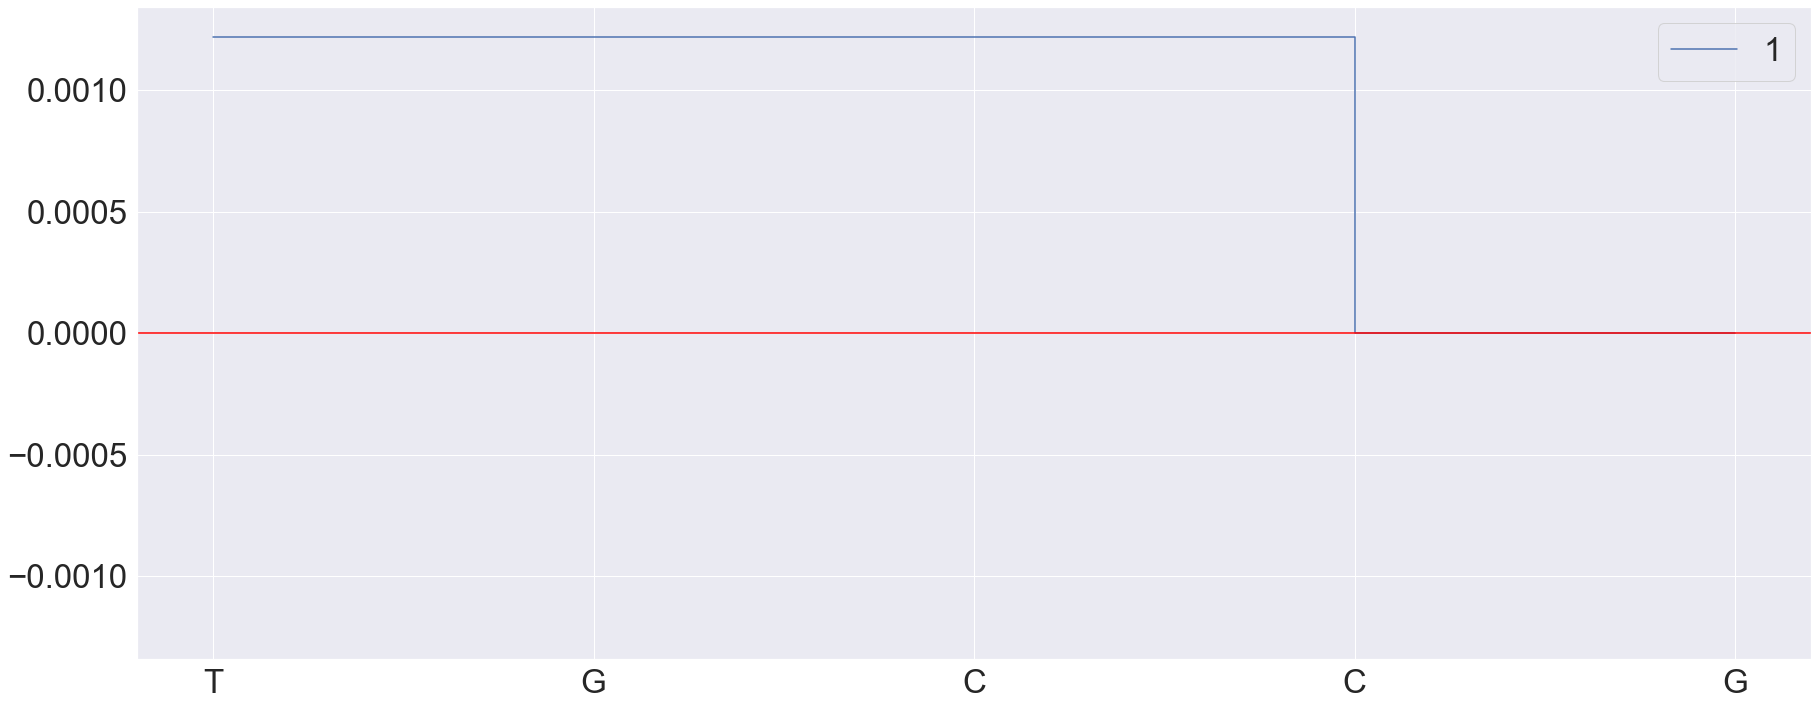

In [ ]:
flo.getPredProfile(cld,0)

In [ ]:
seq_data_raw = pd.read_csv('testdata/promoters_copy.csv', sep=',')
seq_data_raw

,Class,Type,Sequence
0,+,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
1,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
2,-,867,atatgaacgttgagactgccgctgagttatcagctgtgaacgacat...
3,-,1169,cgaacgagtcaatcagaccgctttgactctggtattactgtgaaca...


In [ ]:
seq_input = [Seq(x) for x in seq_data_raw['Sequence']]
seq_features = gk(seq_input, k=5, g=0, t=0, sparse=True)
seq_data = {'data': seq_features,
            'target': (np.array(seq_data_raw.iloc[:, -1]) + 1)/2,
            'target_names': ['non-promoter','promoter']}
seq_data

TypeError: can only concatenate str (not "int") to str

In [ ]:
seq_model = SVC(kernel='linear', C=0.03)
cv_result = cross_validate(seq_model, seq_data['data'], seq_data['target'], cv=KFold(n_splits=10),n_jobs=-1, scoring=['accuracy'],)

In [ ]:
pd.DataFrame(cv_result)

In [ ]:
st = time.time()
seq_features = gk(seq_input, k=5, g=0, t=0, sparse=False)
seq_data = {'data': seq_features,
            'target': (np.array(seq_data_raw.iloc[:, -1]) + 1)/2,
            'target_names': ['non-promoter','promoter']}
seq_data
model1 = SVC(C=0.03, kernel='linear')
cv_result = cross_validate(seq_model, seq_data['data'], seq_data['target'], cv=KFold(n_splits=10),n_jobs=-1, scoring=['accuracy'],)
et = time.time()
elapsed_time = et - st
print("Time difference of ", elapsed_time , "secs")

In [ ]:
df,dict = flo.getWeights(5, model)
df
#print(dict)
#print(data)

In [ ]:
flo.getPredProfile(105,5,data)